In [32]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [33]:
# Declare global variables for image and label
global train_images
global train_labels
global test_images
global test_labels

# Load train/test dataset
train_images = np.load('.\\archive\\X_train.npy')
train_labels = np.load('.\\archive\y_train.npy')
test_images = np.load('.\\archive\\X_test.npy')
test_labels = np.load('.\\archive\\y_test.npy')

In [34]:
def calculate_color_image_sharpness(image):
    # Split the image into its channel components
    channels = cv2.split(image)
    
    # Apply the Laplacian operator to each channel
    laplacian_channels = [cv2.Laplacian(channel, cv2.CV_64F) for channel in channels]
    
    # Calculate the variance of the Laplacian for each channel and sum them
    sharpness = sum(np.var(laplacian) for laplacian in laplacian_channels)
    
    return sharpness

In [35]:
def find_blurry_color_images(images_array, sharpness_threshold):
    # Initialize a list to hold indices of blurry images
    blurry_images_indices = []

    # Iterate over each image in the dataset
    for i in range(images_array.shape[3]):
        image_i = images_array[:, :, :, i]     
        
        # Calculate the sharpness of the current image
        sharpness = calculate_color_image_sharpness(image_i)
        
        # If the sharpness is below the threshold, it's considered blurry
        if sharpness < sharpness_threshold:
            blurry_images_indices.append(i)
    
    return blurry_images_indices

In [36]:
# Preprocess images 
def preprocessImages():
    global train_images
    global train_labels
    global test_images
    global test_labels
    sharpness_threshold = 0.015 
    
    blurry_images_ind = find_blurry_color_images(train_images, sharpness_threshold)
    train_images = np.delete(train_images,blurry_images_ind, axis=3)
    print('sharp_images:' , train_images.shape[3])   
    train_labels = np.delete(train_labels, blurry_images_ind, axis=0)
    print('train sharp_images: ' , train_images.shape[3], train_labels.shape)
    
    
    blurry_images_ind = find_blurry_color_images(test_images, sharpness_threshold)    
    test_images = np.delete(test_images, blurry_images_ind, axis=3)
    test_labels = np.delete(test_labels, blurry_images_ind, axis=0)
    print('test sharp_images:' , test_images.shape[3], test_labels.shape)
    
    # Transpose the array to shape (number of rows, ht, w, channel) 
    train_images = np.transpose(train_images, (3, 0, 1, 2))
    test_images = np.transpose(test_images, (3, 0, 1, 2))
    
    # Convert to grayscale
    train_images = np.dot(train_images[...,:3], [0.2989, 0.5870, 0.1140])
    test_images = np.dot(test_images[...,:3], [0.2989, 0.5870, 0.1140])
    
    # Resize images to 28x28
    train_images = np.array([cv2.resize(img, (28,28)) for img in train_images])
    test_images = np.array([cv2.resize(img, (28,28)) for img in test_images])

In [37]:
preprocessImages()

sharp_images: 22888
train sharp_images:  22888 (22888, 1)
test sharp_images: 5649 (5649, 1)


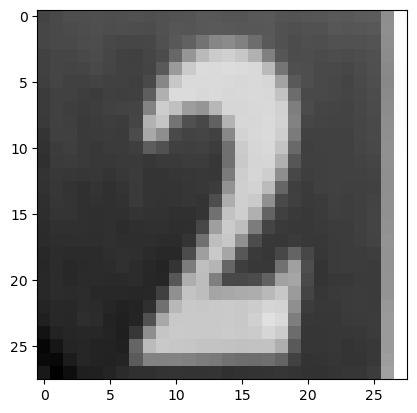

In [38]:
# Just for image display
plt.imshow(train_images[13],cmap='gray')
plt.show()